In [52]:
import seaborn as sns
from adaptive_CI.compute import collect
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from time import time
from glob import glob
import scipy.stats as stats
from IPython.display import display, HTML
from adaptive_CI.saving import *
import  pickle
from pickle import UnpicklingError
import copy
from itertools import compress
import scipy.stats as stats
from plot_utils import *

sns.set_context("notebook", font_scale=1.3)
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Load data

In [53]:
df_stats, df_sampleQuotas, df_contrasts = [], [], []
for name in [ 'nosignal_uniform', 'lowSNR_uniform', 'highSNR_uniform']:
    df_stat, df_sampleQuota, df_contrast = generate_dataframes(name)
    df_stats.append(df_stat)
    df_sampleQuotas.append(df_sampleQuota)
    df_contrasts.append(df_contrast)
    
df_stats = pd.concat(df_stats)
df_sampleQuotas = pd.concat(df_sampleQuotas)
df_contrasts = pd.concat(df_contrasts)


Found 400 files.
0 corrupted files in total, have been removed.
Found 400 files.
0 corrupted files in total, have been removed.
Found 400 files.
0 corrupted files in total, have been removed.


### Converged stats comparison when T=20000

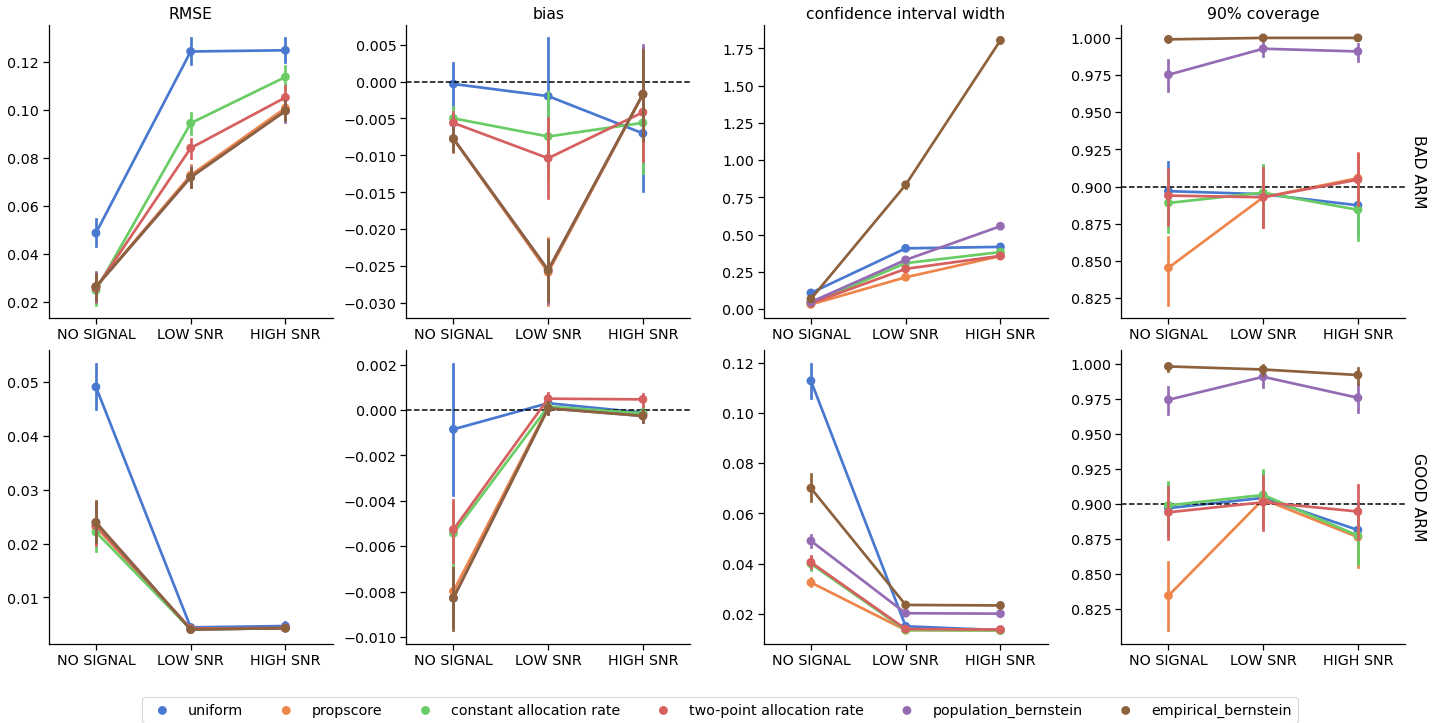

In [58]:
plot_converged_statistics2(df_stats.query(f"T==20000 & noise_func=='uniform'"), #name='stats_20000'
                          hue_order=['uniform', 'propscore','lvdl', 'two_point', 'population_bernstein', 
                                     'empirical_bernstein'],
                          labels=['uniform', 'propscore','constant allocation rate', 'two-point allocation rate',
                                  'population_bernstein', 'empirical_bernstein']
                          )



## Normality of normalized error

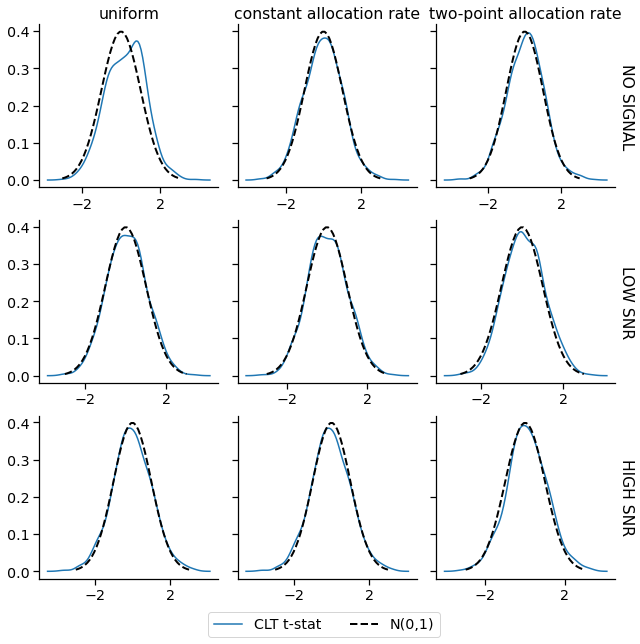

In [59]:
 plot_hist(df_stats.query('policy==0 & T==20000'), noise_func='uniform' ,#name='good_20000_hist',
          methods =['uniform', 'lvdl', 'two_point'], 
          col_names=['uniform', 'constant allocation rate', 'two-point allocation rate'])

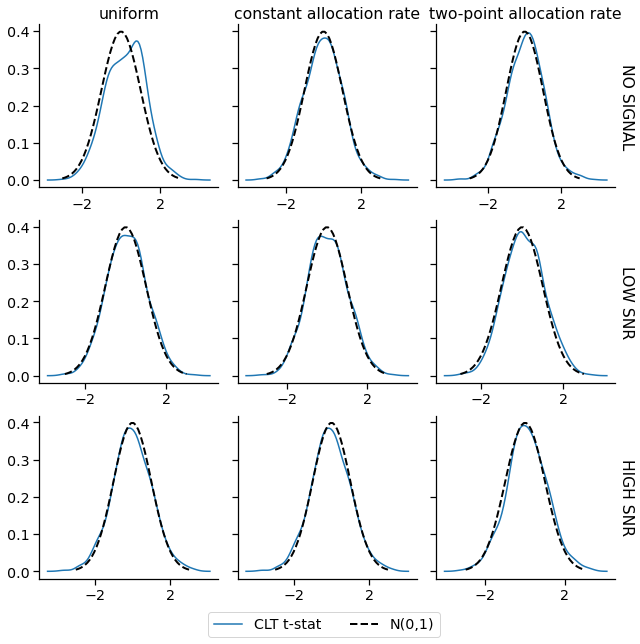

In [60]:

plot_hist(df_stats.query('policy==0 & T==20000'), noise_func='uniform',#name='good_20000_hist'
         methods =['uniform', 'lvdl', 'two_point'], 
          col_names=['uniform', 'constant allocation rate', 'two-point allocation rate'])

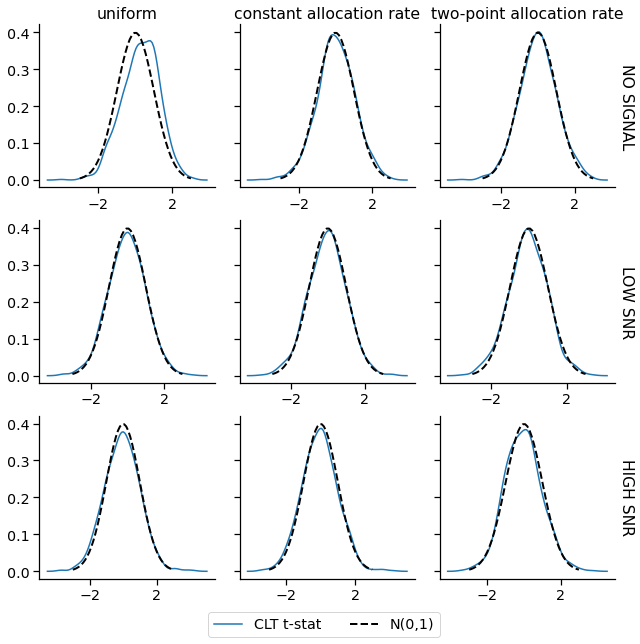

In [61]:
 plot_hist(df_stats.query('policy==2 & T==20000'), noise_func='uniform' ,#name='bad_20000_hist'
          methods =['uniform', 'lvdl', 'two_point'], 
          col_names=['uniform', 'constant allocation rate', 'two-point allocation rate'])

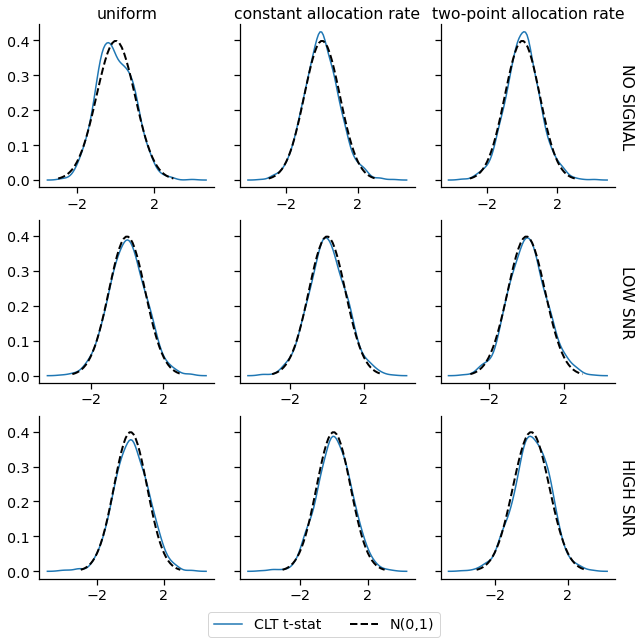

In [62]:
 plot_hist(df_contrasts.query("policy=='(0,2)'& T==20000"), noise_func='uniform', #name='contrast_20000_hist',
           methods =['uniform', 'lvdl', 'two_point'], 
          col_names=['uniform', 'constant allocation rate', 'two-point allocation rate'])

## lambda(T-t)

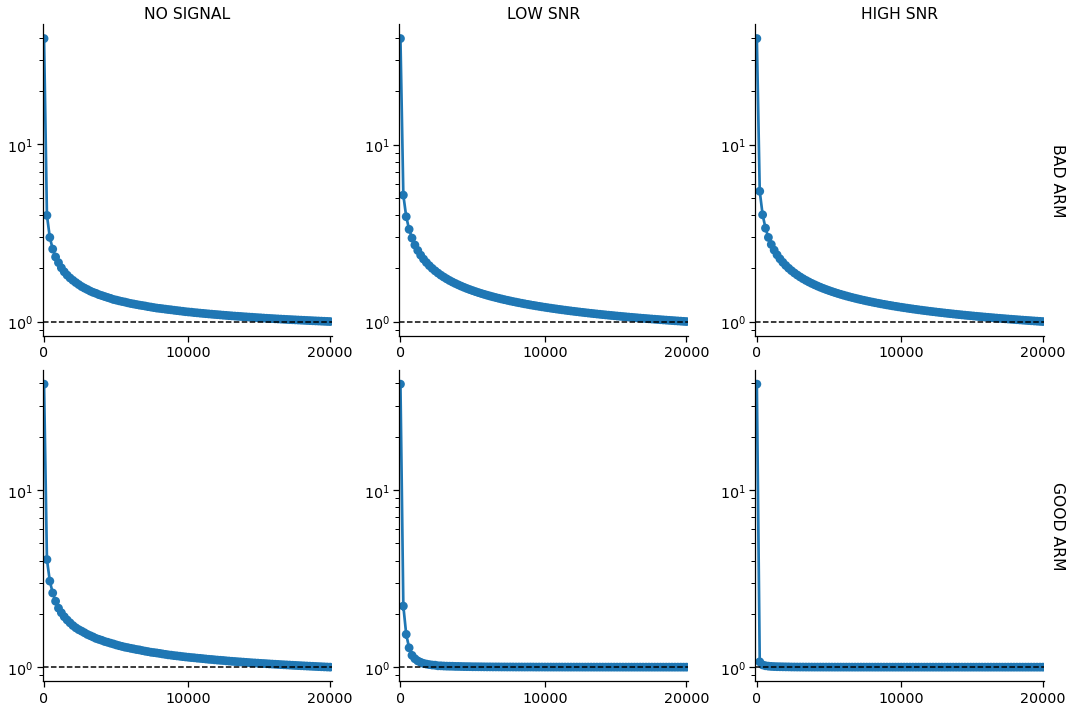

In [63]:
plot_lambda(df_sampleQuotas.query("T==20000 & method == 'two_point'"), noise_func='uniform')

## Compare contrasts

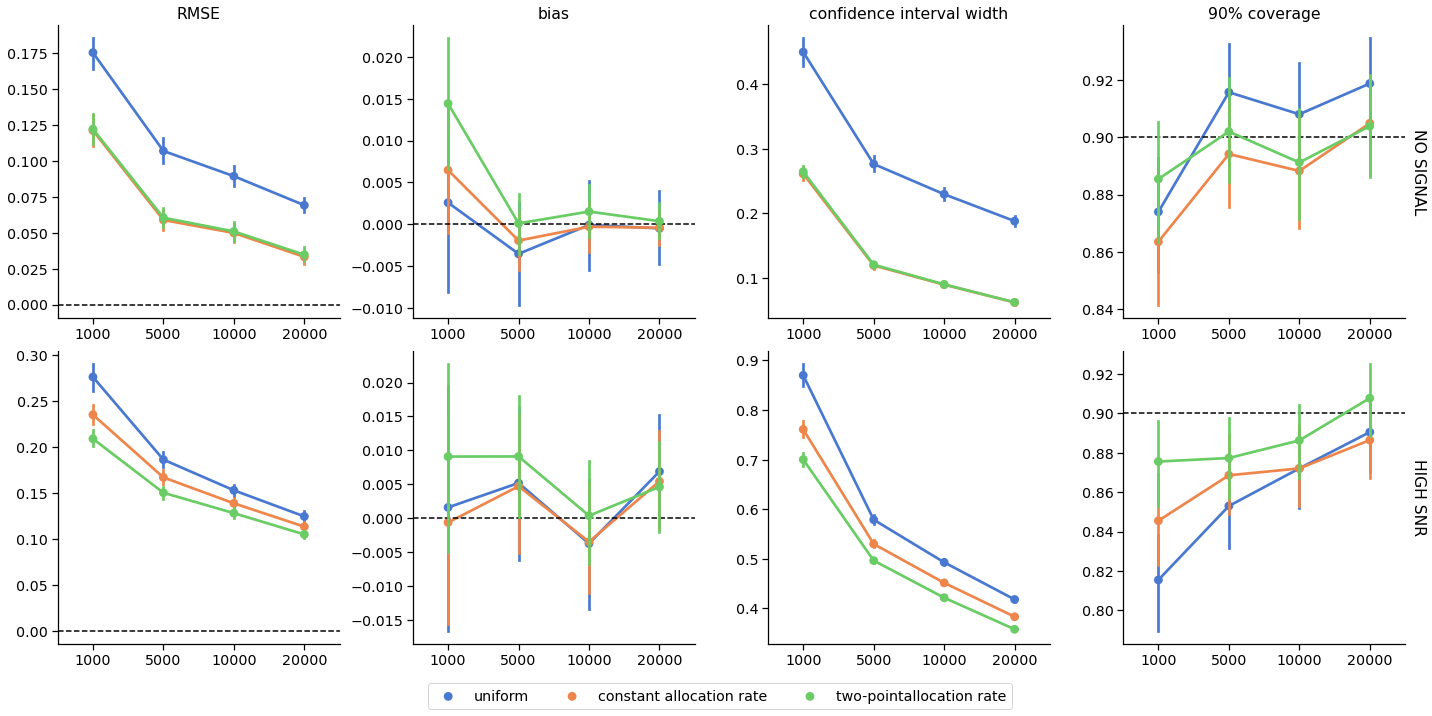

In [64]:

plot_contrast(df_contrasts.query("policy=='(0,2)'"), 
              hue_order=['uniform', 'lvdl', 'two_point'],
              labels=['uniform', 'constant allocation rate', 'two-pointallocation rate'],
             )
              # name="contrast")

## Compare with W-decorrelation

In [65]:
df_stats['compareW'] = np.array(df_stats['dgp']) + np.array(df_stats['policy']).astype(str)

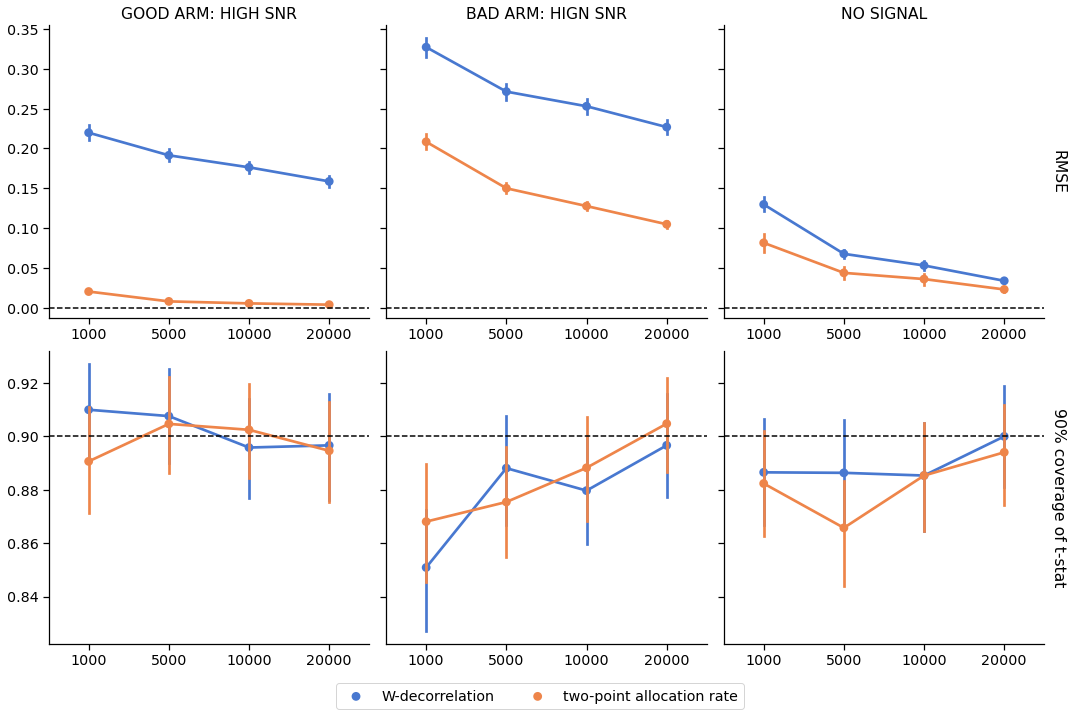

In [66]:
compare_with_W(df_stats, noise_func='uniform')